# Subclass Filter

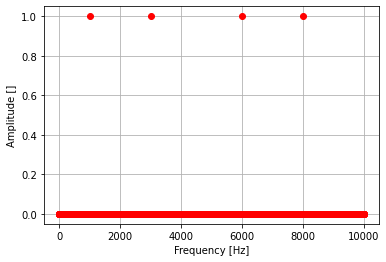

In [1]:
%matplotlib inline
import numpy as np
from wavewatson import Waveform

vcc = Waveform.load_from_file(filepath=r"demo_signals/vcc.npz")

t = np.linspace(0,1,20000, endpoint=False)
s1 = 1 * np.sin(2 * np.pi * 1000 * t)
s2 = 1 * np.sin(2 * np.pi * 3000 * t)
s3 = 1 * np.sin(2 * np.pi * 6000 * t)
s4 = 1 * np.sin(2 * np.pi * 8000 * t)
w = Waveform(time=t, data=s1+s2+s3+s4)
fft = w.fft()
fft.plot()

Waveform --> Name:wave_000, Length:1000, SampleRate:2.005e+02, Tstart: 1.611e-02, Tstop:5.000e+00
Waveform --> Name:wave_000, Length:20000, SampleRate:2.000e+04, Tstart: 0.000e+00, Tstop:1.000e+00


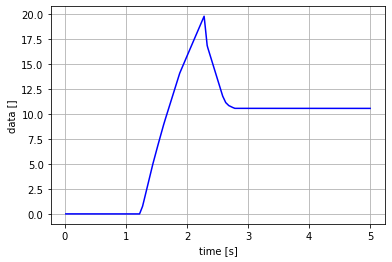

In [2]:
print(vcc)
print(w)

vcc.plot()

### Savitzky Golay

smoothing the data with a low-degree polynomial by the method of linear least squares.

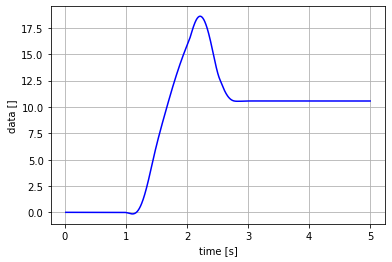

In [3]:
s = vcc.copy()
s.Filter.SavitzkyGolay(window_length=101, polyorder=2, mode="interp")
s.plot()

### Median Filter

Nonlinear digital filter by calculating the median value of the neighborhood.

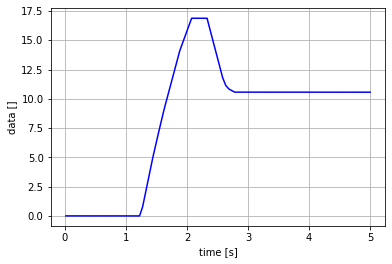

In [4]:
m = vcc.copy()
m.Filter.MedianFilter(window_length=101)
m.plot()

### FIR Lowpass 

FIR low pass filter with hamming window.

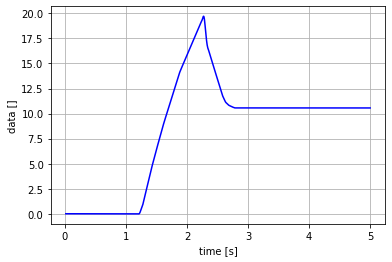

In [5]:
f = vcc.copy()
f.Filter.FIR_LowPass_Hamming(bandwidth=100, window_length=64)
f.plot()

### IIR Lowpass

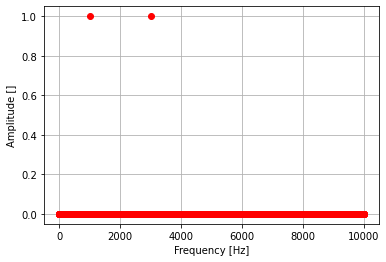

In [6]:
w2 = w.copy()
w2.Filter.IIR_LowPass(f_pass=4000, f_stop=5000, attn_pass=0.01, attn_stop=40, ftype="butter", mode="fb")
w2.fft().plot()

### IIR Highpass

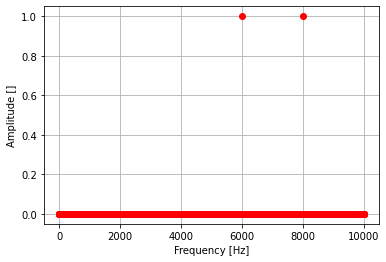

In [7]:
w3 = w.copy()
w3.Filter.IIR_HighPass(f_pass=5000, f_stop=4000, attn_pass=0.01, attn_stop=40, ftype="butter", mode="fb")
w3.fft().plot()

### IIR Bandpass

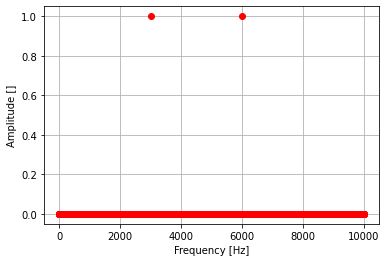

In [8]:
w4 = w.copy()
w4.Filter.IIR_BandPass(f_pass=[2500, 6500], f_stop=[2000, 7000], attn_pass=0.01, attn_stop=40, ftype="butter", mode="fb")
w4.fft().plot()

### IIR Bandstop

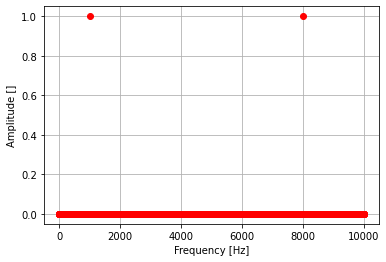

In [9]:
w5 = w.copy()
w5.Filter.IIR_BandStop(f_pass=[2000, 7000], f_stop=[2500, 6500], attn_pass=0.01, attn_stop=40, ftype="butter", mode="fb")
w5.fft().plot()